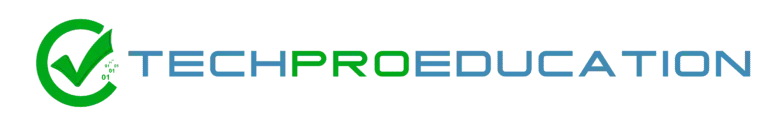

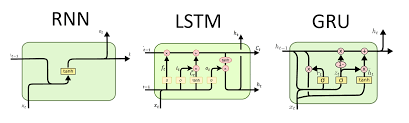

# RNN Syntax Basics

In [80]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

Datamizi (sequence'i) kendimiz olusturacagiz. __linspace__ ile 0 ile 50 arasinda 501 sayi belirledik. Bu noktalarin sin degerlerini aldik ve bu degerleri de y' ye atadik. 

In [81]:
x = np.linspace(0,50,501)
y = np.sin(x)

#bununla sentetik degerler üretiliyor

In [82]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [83]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

amacimiz 500 den sonra gelecek degerleri tahmin etmeye calisiyoruz

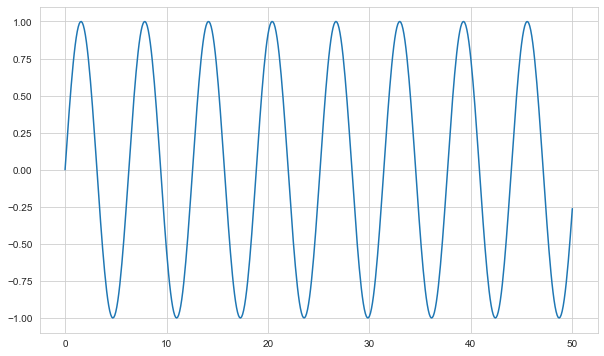

In [84]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [85]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

Tek feature li bir dataframe olustu :

In [86]:
df

Sine
0.000   0.000
0.100   0.100
0.200   0.199
0.300   0.296
0.400   0.389
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[501 rows x 1 columns]

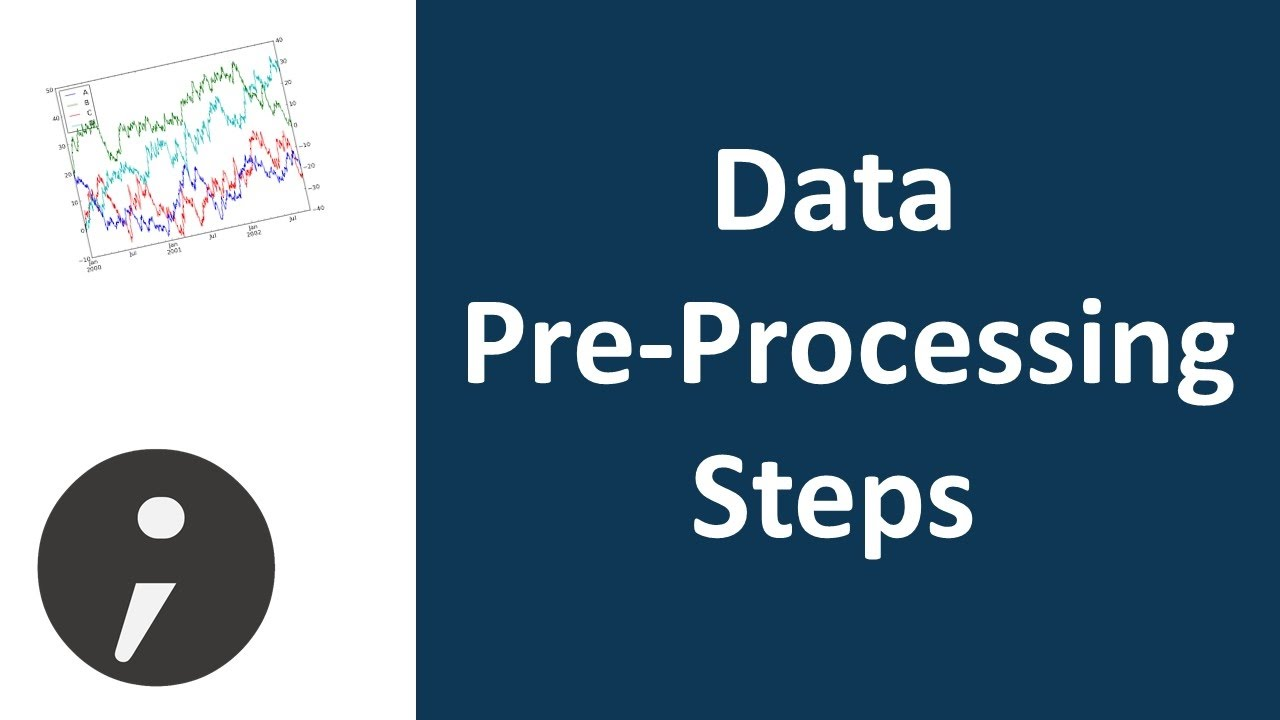

## Preprocessing of Data

### Train Test Split

In [87]:
len(df)

501

simdiye kadar train ve test datalarini ayirirken random olarak bölme yapiyorduk, burda ise datamizi random olarak bölmeyecegiz cünkü datamizin sirasi önemli, bu yüzden datamizin son kismindan belli bir bölümü bir test datasi olarak ayiracagiz

In [88]:
test_percent = 0.15


In [89]:
len(df)*test_percent
#burdan son kismindan 75 tanesini test datasi olarak yapalim dedik, normakde kafadan da 75 yapabilirdik, ama %15 islemini yapalim dedik

75.14999999999999

In [90]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

In [91]:
test_ind = int(len(df) - test_point)
test_ind   #test indexinin basladigi numara,burda indis buluyor, 426 adet degil

426

In [92]:
train = df.iloc[:test_ind]  #test_ind bir yukarida tanimlamistik
test = df.iloc[test_ind:]  #426 dan sonrasi da test datasi olacak

#burda random alamiyoruz, cünkü time series grubuna giriyor
#önceki verileri kullanacakki , sonrakini test edecek, test olani sondan secmek mantikli

#iste burda datayi aliyorut, ilk 426 train datasi oluyor, sonrasi ise test datasi oluyor

In [93]:
train

Sine
0.000   0.000
0.100   0.100
0.200   0.199
0.300   0.296
0.400   0.389
...       ...
42.100 -0.952
42.200 -0.978
42.300 -0.994
42.400 -1.000
42.500 -0.996

[426 rows x 1 columns]

In [94]:
test

Sine
42.600 -0.982
42.700 -0.959
42.800 -0.925
42.900 -0.883
43.000 -0.832
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[75 rows x 1 columns]

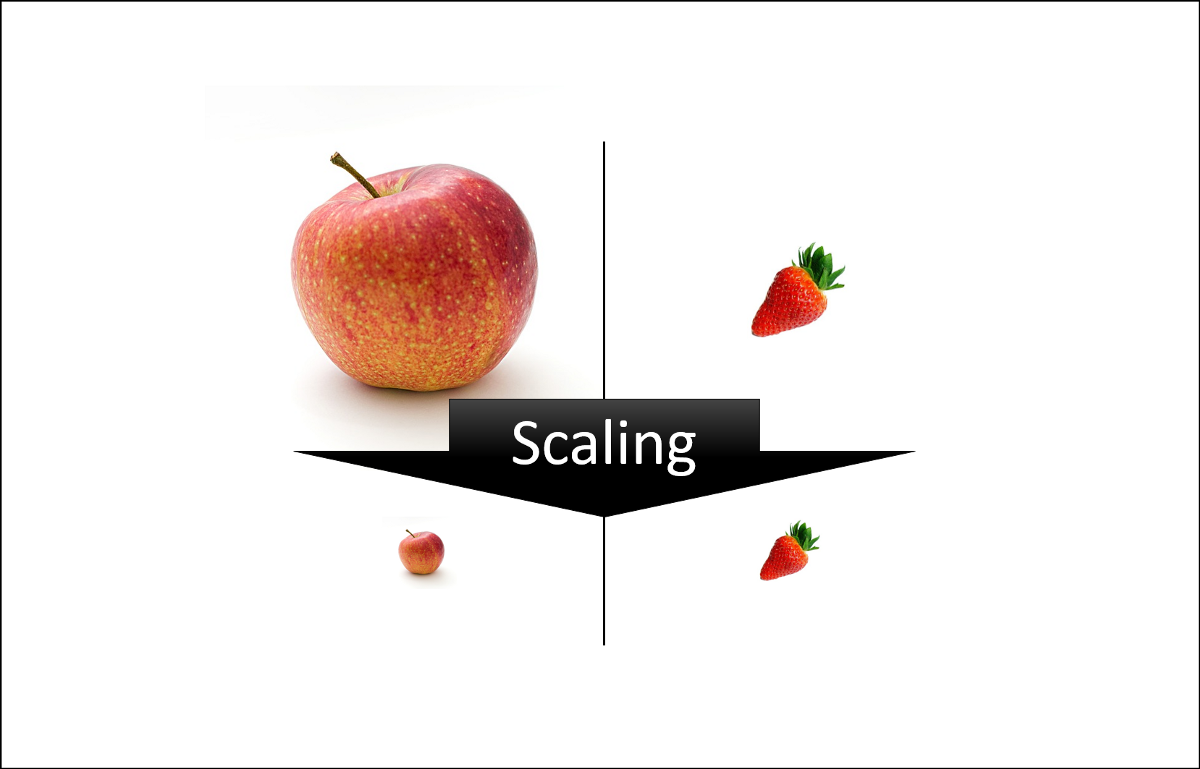

### Scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()

#burda MinMax scaliing yapalim dedik, bazen robust scaling te kullaniliyor

In [57]:
train_scaled = scaler.fit_transform(train)  #fit setin uzunlugunu hesapliyor, ve yapilacak islemleri hazirliyor, transformda ise formül uygulaniyor
test_scaled = scaler.transform(test)

#teste sadece transform yapiyoruz

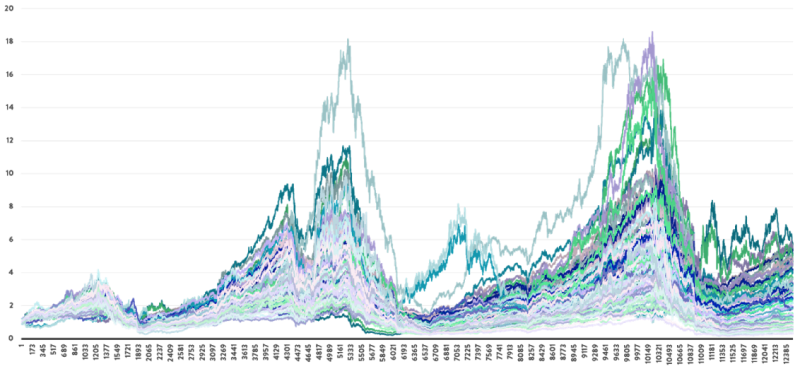

## Time Series Generator

In [58]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# lenght 

In [59]:
#help(TimeseriesGenerator)

![](2022-11-18-21-12-32.png)

In [60]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)  #2 adimdan sonra 3cüyü tahmin et
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled, #hem buraya hem asagiya veriyor, hoca ayni sey oldugu iicn dedi bu datada
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size, #1 diye atamistik
                                stride = stride)


#eger lenght ti 100 yaptiysan önceki 100 de ele alip, öceki katmanlarda neler olup bittigini hafizasina alip ilerliyor  
# streide 1 oldugu icin bir adim ilerliyor, ve bu seferde bir önceden tahmin ettiginide alarak ilerliyor 
# #biraz fibonacci sayi dizilerine benzeyerek ilerliyor, lenght kac secersen, okadarlik verileri kümeleyerek aliyor 
# 
# 
# burda aslinda generator tahminde yapiyor cünkü generator[0] yaptigimizda cikti olarak iki deger ve bir tane de tahmin veriyor
#                             

In [61]:
len(train_scaled)

426

In [62]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

424

In [63]:
generator

Generator, 0. index' te t_train ve y_train degerlerini verdi. x_train' de length uzunlugundan dolayi 2 deger var. Bu iki degere gore 3. deger tahmin edilecek :

In [64]:
generator[0]

#lenght iki taneydi burda 3cüyüde tahmin ediyor

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [65]:
# What does the first batch look like?
X, y = generator[0]


Generator' i daha rahat gorebilmek icin X ve y' ye attik. Sonra yazdirdik. Verilen array' ler ve tahmin edilmesi gereken 3. satiri görüyoruz :

In [66]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


Ilk 10 degeri asagida train_scaled datasinda da gorebiliriz :

In [67]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

<AxesSubplot:>

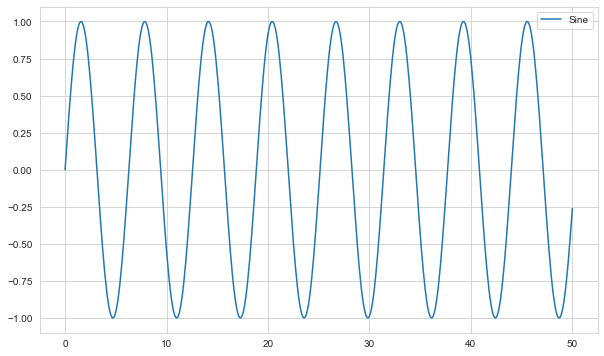

In [68]:
df.plot()

The more length the more training time

__Length degeri nasil hesaplanmali? :__ Kendini yenileyen bir periyot elde etmemiz gerekir. Ilk degerimiz 0' dan baslamis, o zaman tekrar 0 degerine geldiginde bir periyot tamamlanmis olur. Datada 501 tane nokta var, buna dayanarak hesaplama yaparsak ilk periyodun tamamlandigi noktayi 64 olarak buluruz. 64' te bir kendini tekrar eden bir periyot var diyebiliriz. batch_size=1 secerek generator' i olusturduk :

Asagidaki parametre degerlerini degistirdik ve önceki ile farki kiyasladik :

In [69]:
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

#tek bir features var, 


In [70]:
# What does the first batch look like?
X, y = generator[0]

In [71]:
len(generator)
#362 tane generator olustu

362

In [72]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

#64 veri modele verilecek,  bunlara göre 65. sayi tahmin edilecek :lenght=64 oldugu icin bir üstte

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

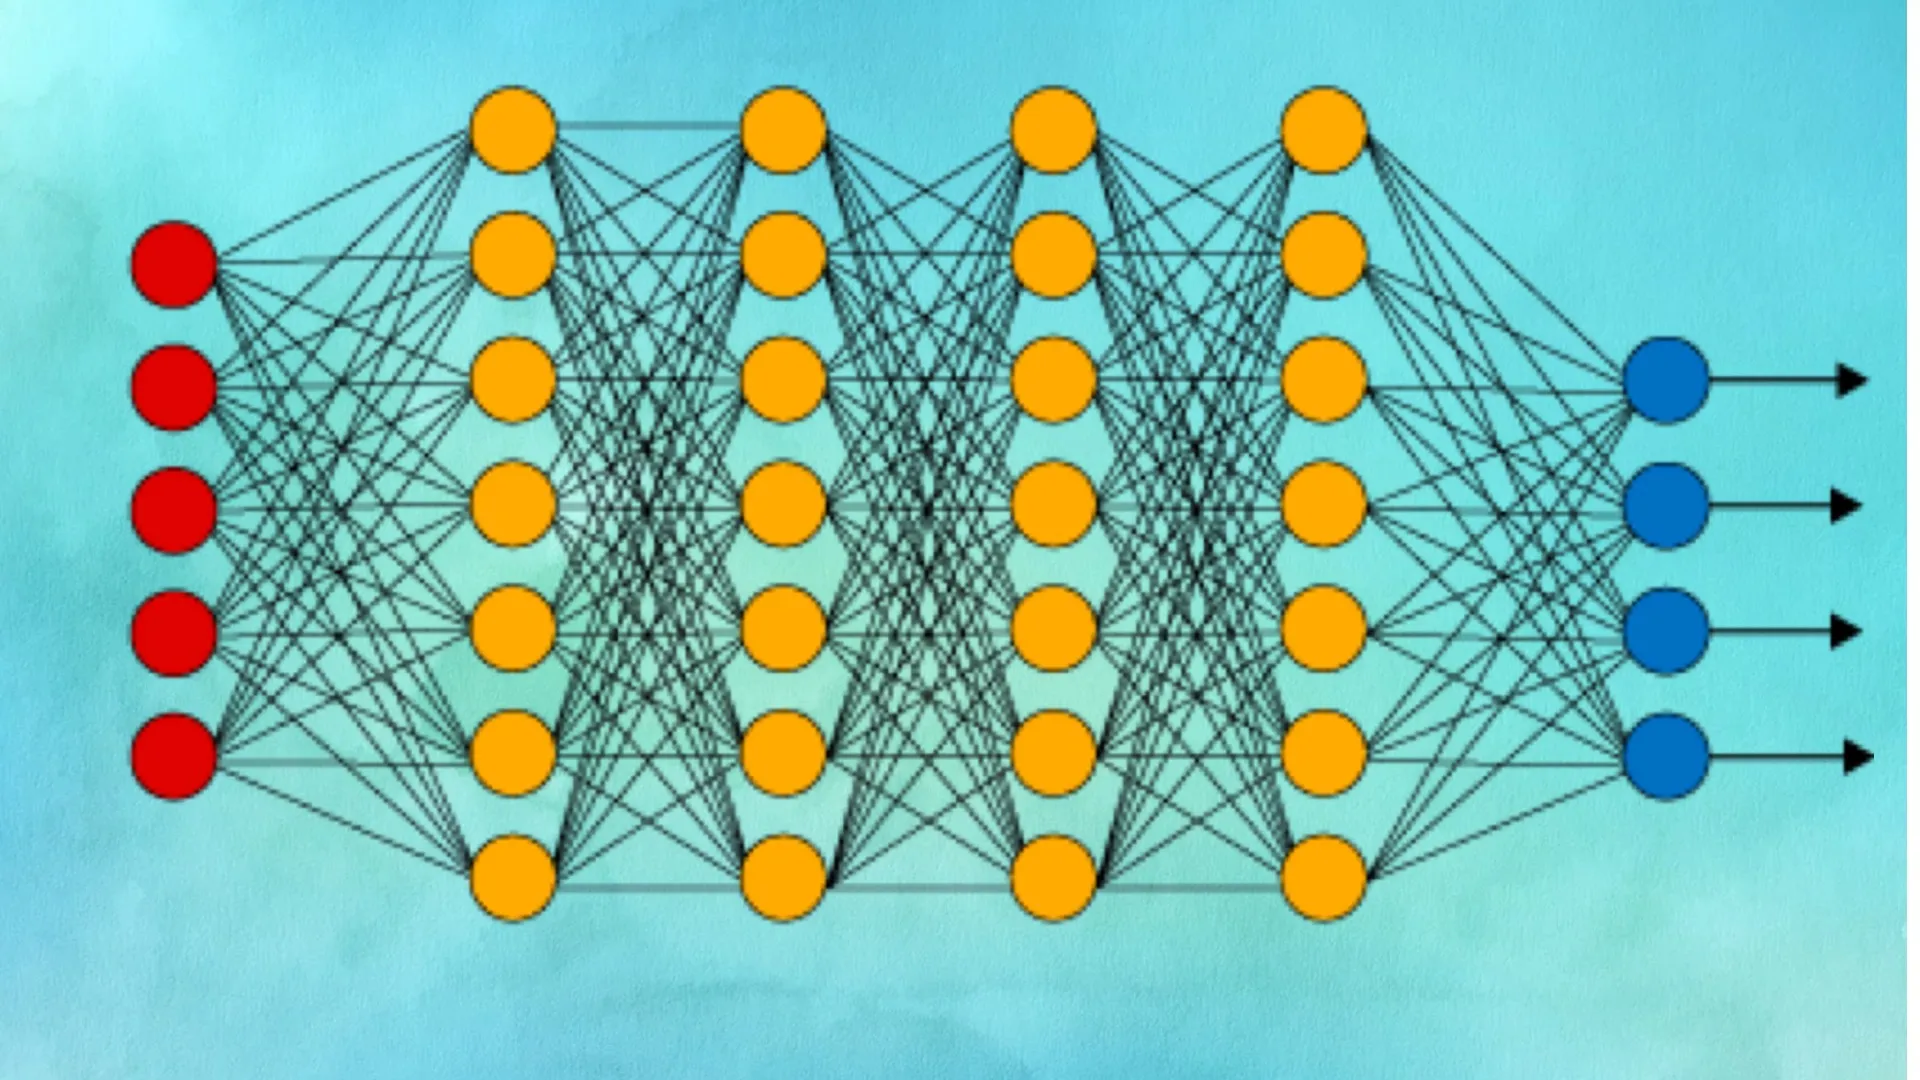

In [ ]:
#burdan öncesinde modele girecek datalar olusturuldu

## Modelling

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [74]:
# We're only using one feature in our time series
n_features = 1

Modele bir adet hidden layer ekledik. 

__units= 100 -->__  Hidden layer' da 100 tane nöron olsun.

__input_shape=(length, n_features)) -->__ Ilk eleman satir sayisi, ikinci eleman sütun sayisini verir. length=64 satir sayisi, n_features=1 sütun sayisi.

__model.add(Dense(units = 1)) -->__ Output layer' da 1 nöron var. (Regression analizi yaptigimiz icin tek bir nöron olmali.)

In [75]:
# define model
model = Sequential()  #ardarda devam ediyor

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features))) #burda simple RNN diye geciyor

#function olarak tanjant kullanmis, bazen relu ve bazen tanjant kullanilabiliyor
#input_shape birini satir digerini sütun olarak al diyoruz
#

# Final Prediction
model.add(Dense(units = 1))  #linear bir deger ciktigi icin bir cikti koyuyoruz

model.compile(optimizer='adam', loss='mse')

Hidden layer' da cok fazla parametre var. ANN modeli kursaydik cok daha az parametre olurdu. (Simple RNN yerine LSTM kullansaydik, 4 gate oldugu icin 4 kat parametremiz olacakti) :

In [76]:
model.summary()
#LSTM de 4 tane kapi oldugu icin burdakilerin  4 kati daha fazla veri olacak

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [77]:
# params = 1 * ((size_of_input + 1) * size_of_output + size_of_output^2)
1 * ((1+1)*100+(100**2))

#parametre sayisi bu skeilde bulunmus

10200

In [97]:
model.fit_generator(generator = generator, epochs = 5) 

#yukaridaki generator burda kullaniliyor
#yukarida tanimlamistik

Epoch 1/5
362/362 [==============================] - 6s 14ms/step - loss: 0.0055
Epoch 2/5
362/362 [==============================] - 5s 13ms/step - loss: 2.3730e-04
Epoch 3/5
362/362 [==============================] - 5s 13ms/step - loss: 6.3275e-04
Epoch 4/5
362/362 [==============================] - 5s 13ms/step - loss: 1.0874e-05
Epoch 5/5
362/362 [==============================] - 4s 12ms/step - loss: 6.9677e-05


<AxesSubplot:>

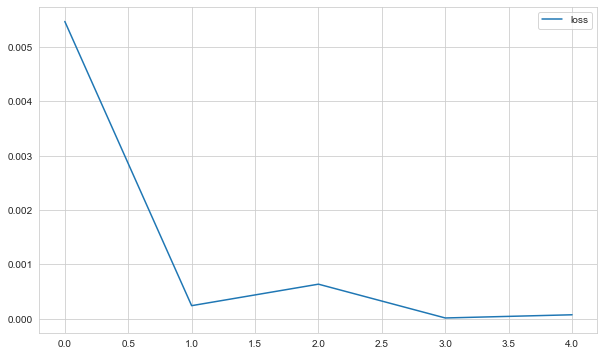

In [98]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#Elimizde validation datasi olmadigi icin overfit durumu var mi yok mu göremiyoruz :

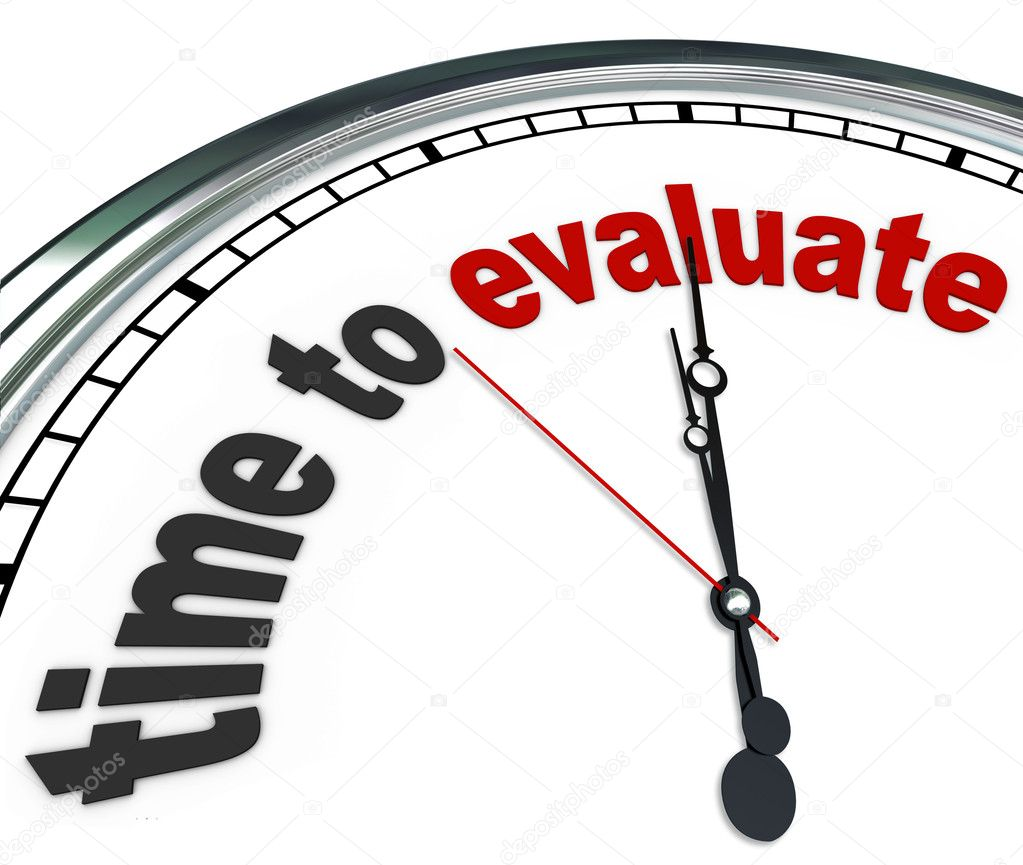

## Evaluate on Test Data

Datayi degerlendirmek icin train datasi üzerine forecast yapmamiz gerekir. 

__length__ uzunlugumuz kac ise sondan o kadarlik datayi alacagiz ve bu verilere gore bir sonraki adimi tahmin etmeye calisacagiz. Yaptigimiz tahmini de dataya katarak sequence' i bir ileri tasiyacagiz ve bir sonraki adimi tahmin etmeye calisacagiz. Bu sekilde yeni tahminleri de sona ekleyerek sirayla sonraki adimlari tahmin ederek istedigimiz adim kadar gidecegiz. (length uzunlugu kadar forecast yapilmasi önerilir). Buradaki datamiz basit bir data oldugu icin forecast islemini uzatabiliriz.

In [99]:
first_eval_batch = train_scaled[-length:]

#lengt burda son 64 degeri almis oluyoruz galiba

Datanin sonundan __length__ kadar olan veriyi aldik (Son 64 deger) :

In [100]:
first_eval_batch.shape

(64, 1)

Datanin shape' i (64,1) fakat modelin bekledigi shape, (1,64,1) yani 3 boyutlu.

In [101]:
generator[0][0].shape

#3 boyutlu girmek gerekiyor, burda reshape ile bir boyut ekliyoruz

(1, 64, 1)

Boyut degistirme icin 2 yöntem var. Ilki, basina 1 koyarak boyutu 2' den 3' e cikarma. Ikincisi ise __expand_dim__ fonksiyonu :

In [102]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
# first_eval_batch = np.expand_dims(first_eval_batch, axis=0)

In [103]:
first_eval_batch.shape

(1, 64, 1)

Boyutunu modele gore uyarladigimiz datayi prediction icin verebiliriz. Model, datadaki 64 degere göre 65. degerin ne oldugunu tahmin edecek :

In [104]:
model.predict(first_eval_batch)

#ilk predict

array([[0.00819062]], dtype=float32)

Buldugumuz bu tahmini, test datasinin ilk elemani ile kiyaslayacagiz. Model gercekten bu degere yakin bir tahmin yapti. Yapilan prediction 2 boyutlu bir array :

In [105]:
test_scaled[0]

#datadaki gercek degeri buymus,yakin bir deger bulmus

array([0.00885189])

__ÖZETLE ;__ test_prediction isimli bos bir kume olusturduk. Bu bos kumenin icine yaptigimiz prediction' lari atacagiz. first_eval_batch degiskenine train datasinin son length uzunlugu kadar olan datayi attik, reshape ile boyutunu 2 boyuttan 3' e cikardik. Asagidaki for döngüsünün icine bunlari tanimlayacagiz : 

In [106]:
test_predictions = []

first_eval_batch = train_scaled[-length:]  #sondan lenght almak icin bunu yapiyoruz
current_batch = first_eval_batch.reshape((1, length, n_features))

In [107]:
current_batch.shape

(1, 64, 1)

In [108]:
current_batch

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

Yukarida modelimize, 64 degere gore 65. degeri tahmin ettirmistik (0.0085). Bastaki degeri attik onun yerine buldugumuz 65. prediction degerini __np.append__ yöntemi ile son kisma ekledik :

__np.append__ icine bir array, array' in altina eklenecek prediction degeri ve hangi axis' e eklenmesi gerektigi bilgisini ister. 

__current_batch[:,1:,:] --->__ 1 yazdigimiz kisim satir sayisini ifade ettigimiz kisim. Bu kismi degistirerek indexi 0' dan degil, 1' den baslatmasini söylemis olduk. (En sondaki nokta sütun sayisi). Bu islemden sonra satir sayisi 63' e düstü. Sonuna yeni buldugumuz prediction degerini 3 boyutlu hale getirerek ekledik. Boylece sample sayisi yine 64' e tamamlanmis oldu.

In [109]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1)

bu degerleri yanyana görmek icin

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

### Final For Loop to predict step by step 

Yukarida yaptigimiz islemin aynisini for döngüsü ile 75 test datasi boyunca yapacagiz. Yukarida yazdigimiz kodlarin aynisini for döngüsü icine tanimladik. Test datasinin uzunlugu boyunca her islemde prediction yapacak ve yaptigi prediction' i tanimlanan bos liste icine atacak. Son olarak current_batch' i güncelleyerek her seferinde gelen yeni tahmini ekleyip bastan bir sample cikaracak. Burdan cikan forecast sonuclarini daha sonra test datasi ile kiyaslayacagiz :

In [110]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

Forecast isleminde yapilan prediction' lar :

In [111]:
predictions_scaled

[array([0.00819062], dtype=float32),
 array([0.01967397], dtype=float32),
 array([0.03559205], dtype=float32),
 array([0.05597709], dtype=float32),
 array([0.08056186], dtype=float32),
 array([0.10919333], dtype=float32),
 array([0.14145927], dtype=float32),
 array([0.1771219], dtype=float32),
 array([0.21603943], dtype=float32),
 array([0.2576634], dtype=float32),
 array([0.30183026], dtype=float32),
 array([0.34801582], dtype=float32),
 array([0.3958982], dtype=float32),
 array([0.4449938], dtype=float32),
 array([0.49482462], dtype=float32),
 array([0.5449479], dtype=float32),
 array([0.5947082], dtype=float32),
 array([0.64378536], dtype=float32),
 array([0.6913064], dtype=float32),
 array([0.7370132], dtype=float32),
 array([0.7801569], dtype=float32),
 array([0.82033575], dtype=float32),
 array([0.85700995], dtype=float32),
 array([0.8896816], dtype=float32),
 array([0.91815627], dtype=float32),
 array([0.9418401], dtype=float32),
 array([0.96068805], dtype=float32),
 array([0.97

Test datasindaki gercek degerler :

In [112]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

Gercek degerler ile prediction' lari kiyaslamadan once prediction degerlerini __inverse_transform__ ile gercek degerlere donusturduk ki kiyaslama yapabilelim :

In [113]:
predictions = scaler.inverse_transform(predictions_scaled)

#scaled edilmisleri eski hallerine getiriyoruz

In [114]:
predictions

array([[-0.9836091 ],
       [-0.96064259],
       [-0.92880667],
       [-0.88803693],
       [-0.83886778],
       [-0.78160531],
       [-0.71707393],
       [-0.64574926],
       [-0.56791481],
       [-0.48466754],
       [-0.39633453],
       [-0.30396416],
       [-0.20820017],
       [-0.11000976],
       [-0.01034891],
       [ 0.08989689],
       [ 0.18941666],
       [ 0.28757018],
       [ 0.38261152],
       [ 0.47402441],
       [ 0.56031109],
       [ 0.64066812],
       [ 0.71401593],
       [ 0.77935867],
       [ 0.83630759],
       [ 0.8836749 ],
       [ 0.92137048],
       [ 0.94876074],
       [ 0.96574984],
       [ 0.97218697],
       [ 0.96811338],
       [ 0.95376427],
       [ 0.92914251],
       [ 0.8949656 ],
       [ 0.85138029],
       [ 0.79907215],
       [ 0.73849763],
       [ 0.67041084],
       [ 0.59551284],
       [ 0.51437035],
       [ 0.42806447],
       [ 0.33729245],
       [ 0.24301153],
       [ 0.1461488 ],
       [ 0.04770918],
       [-0

In [115]:
test

Sine
42.600 -0.982
42.700 -0.959
42.800 -0.925
42.900 -0.883
43.000 -0.832
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[75 rows x 1 columns]

Test datasina predictions' lari yeni bir sütun olarak ekledik :

In [116]:
test['RNN_Predictions'] = predictions

#yanyana görelim dedik

In [117]:
test


Sine  RNN_Predictions
42.600 -0.982           -0.984
42.700 -0.959           -0.961
42.800 -0.925           -0.929
42.900 -0.883           -0.888
43.000 -0.832           -0.839
...       ...              ...
49.600 -0.617           -0.585
49.700 -0.536           -0.510
49.800 -0.449           -0.429
49.900 -0.357           -0.345
50.000 -0.262           -0.258

[75 rows x 2 columns]

<AxesSubplot:>

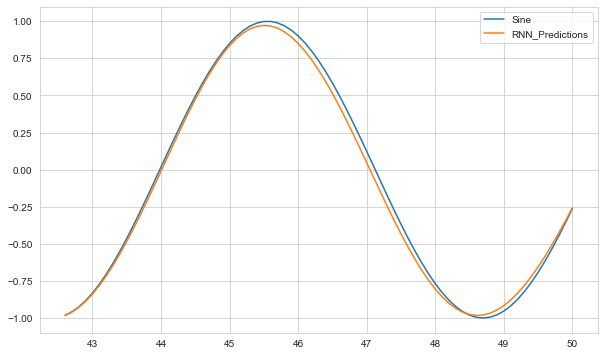

In [118]:
test.plot()
#burda güzel bir 

## Early Stopping and Validation Generator

In [119]:
from tensorflow.keras.callbacks import EarlyStopping

EarlyStop eklemek icin validation_data olmasi gerekir. validation_datasini Generator islemi icin hazirlamamiz gerekecek.

In [120]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

Yukaridaki generator isleminin aynisini yaptik; ilave olarak validation_generator tanimladik fakat data ve target olarak test datasini tanimladik. Bu sekilde validation_data' sini ürettik :

In [121]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)
#burda test bir satir üstte traine uyguluyoruz


test range=75, length range=64 idi. validation_generator' i tanimlarken length' i 64' ten kücük bir sayi secseydik, TimeseriesGenerator bize herhangi bir sonuc üretemezdi. Bir sonuc üretebilmesi icin en az 65 olmasi gerekir ki elimizde 75 adet var. validation_generator bize 11 adet validation datasi üretmis :

In [122]:
len(validation_generator)

11

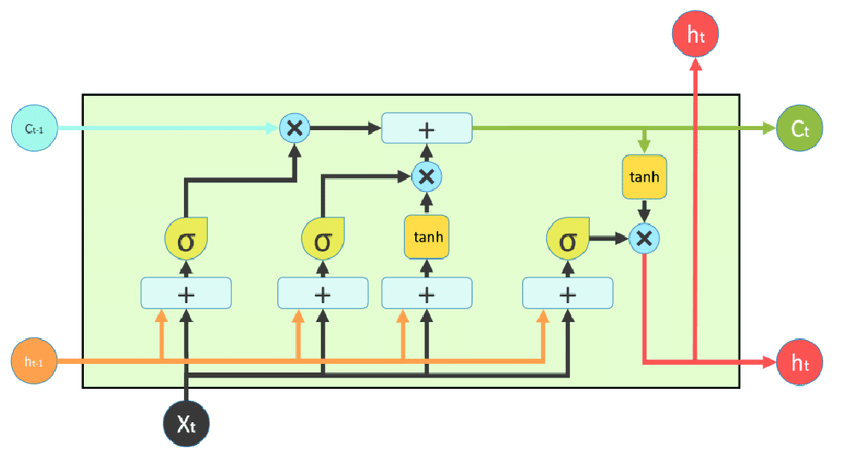

## LSTM

Modelimizi bu sefer LSTM ile olusturacagiz. LSTM layer' da LSTM' i belirtmemiz disinda yaptigimiz farkli bir islem yok :

In [123]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 100, activation = "tanh", input_shape = (length, n_features)))
#model bu satirda kuruluyor, relu olarakta secilebilir

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')  #linear setiydi

In [124]:
model.summary()
#burda LSTM de 4 kapin oldugu icin fazla sayila oldu

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [125]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

EarlyStop da kullanabildigimiz icin 20 epoch verdik ve modelimizi egittik :

In [126]:
model.fit_generator(generator = generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks = [early_stop])

Epoch 1/20
362/362 [==============================] - 12s 27ms/step - loss: 0.0101 - val_loss: 1.8941e-05
Epoch 2/20
362/362 [==============================] - 9s 26ms/step - loss: 1.2161e-04 - val_loss: 1.5936e-05
Epoch 3/20
362/362 [==============================] - 9s 26ms/step - loss: 2.4330e-04 - val_loss: 1.5986e-06
Epoch 4/20
362/362 [==============================] - 9s 25ms/step - loss: 1.5448e-04 - val_loss: 3.0830e-05
Epoch 5/20
362/362 [==============================] - 9s 25ms/step - loss: 2.5869e-04 - val_loss: 5.9572e-06


<AxesSubplot:>

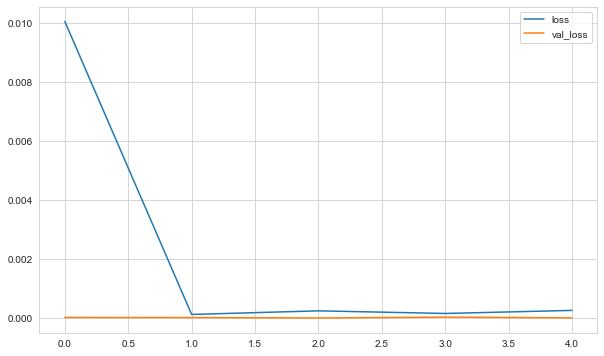

In [127]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
# burda güzel bi score yakalamis

Yukarida yaptigimiz gibi for döngüsü ile prediction' larimizi aldik :

In [128]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

Prediction' lari gercek degerlere dönüştürdük ve buldugumuz sonuclari test datasinin sonuna ekledik :

In [129]:
predictions = scaler.inverse_transform(predictions_scaled)
test['LSTM Predictions'] = predictions
test

#RNN ve LSTM predictin degerlerini yanyana görüyoruz

Sine  RNN_Predictions  LSTM Predictions
42.600 -0.982           -0.984            -0.975
42.700 -0.959           -0.961            -0.950
42.800 -0.925           -0.929            -0.916
42.900 -0.883           -0.888            -0.872
43.000 -0.832           -0.839            -0.820
...       ...              ...               ...
49.600 -0.617           -0.585            -0.734
49.700 -0.536           -0.510            -0.661
49.800 -0.449           -0.429            -0.581
49.900 -0.357           -0.345            -0.495
50.000 -0.262           -0.258            -0.403

[75 rows x 3 columns]

LSTM de RNN'e benzer sonuclar verdi. LSTM' in avantajlarini burada göremedik çünkü datamiz basic bir data. Daha karmasik sequence' lerde LSTM daha yüksek skorlar verir :

<AxesSubplot:>

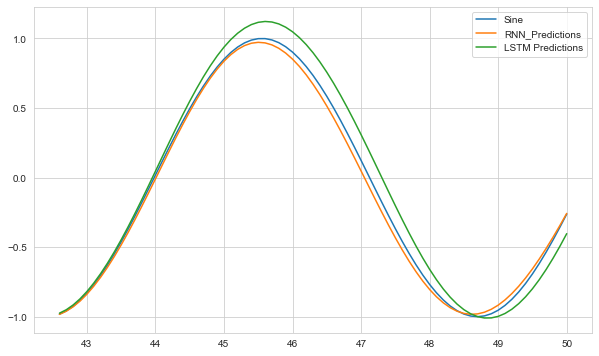

In [130]:
test.plot()
#scorelar yakin cikmis

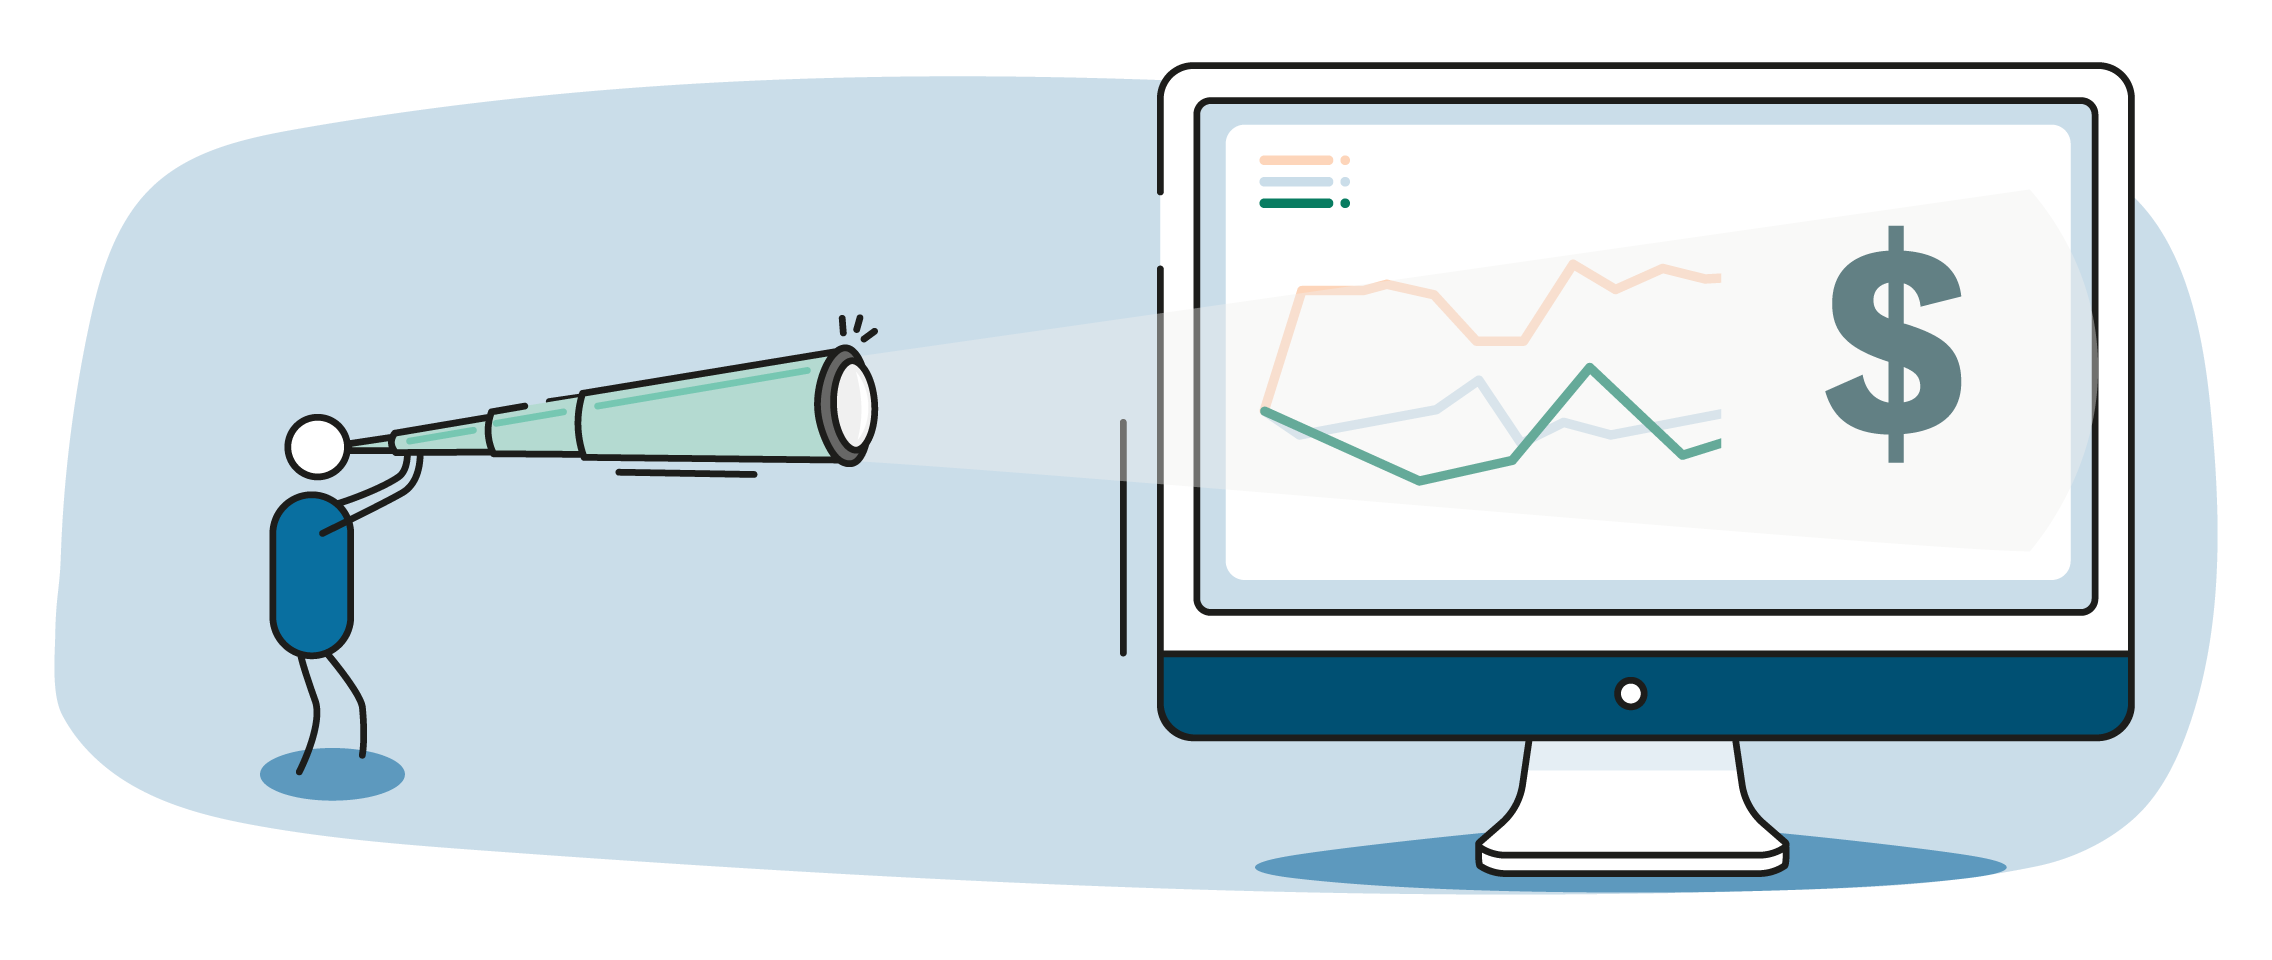

## Retrain and Forecasting

Final model'e tüm datayı verip en iyi modeli oluşturma işlemi gibi. Bunda da en son en iyi parametreleri tespit edip emin olduktan sonra tüm datayı verip en iyi şekilde eğitiyoruz modelimizi

In [131]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)
#full datanin scale hali

TimeseriesGenerator icindeki data ve target kisimlarina tüm datayi verdik. length ve batch_size degerlerini egitimdeki ile ayni verdik :

In [132]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)
#tüm datayi veriyoruz

En son olusturdugumuz LSTM modeli ile ayni degerlerle modelimizi olusturduk. Sadece epoch sayisini 6' ya düşürdük cünkü yukarida model 5 epoch' da egitimini tamamlamisti. Validation datasi olmadigi icin EarlyStop koyamiyoruz. Bu yüzden 6 epoch vererek egitimi tamamladik :

In [133]:
model = Sequential()
model.add(LSTM(100, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6)

#LSTM yapiyoruz

Epoch 1/6
437/437 [==============================] - 14s 27ms/step - loss: 0.0070
Epoch 2/6
437/437 [==============================] - 12s 27ms/step - loss: 2.7356e-04
Epoch 3/6
437/437 [==============================] - 12s 28ms/step - loss: 2.0669e-04
Epoch 4/6
437/437 [==============================] - 11s 25ms/step - loss: 3.8843e-04
Epoch 5/6
437/437 [==============================] - 11s 24ms/step - loss: 1.0460e-04
Epoch 6/6
437/437 [==============================] - 11s 25ms/step - loss: 1.6870e-04


Yapacagimiz forecast' in uzunlugu, length kadar yani 64 uzunlugunda olacak.  Forecast sonuclarini herhangi bir seyle kiyaslayamayacagiz. Sadece tahminleri orjinal df' in devamina ekleyerek görsellestirecegiz.

In [134]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [135]:
forecast = scaler.inverse_transform(forecast)

In [136]:
forecast

array([[-0.17139132],
       [-0.06913722],
       [ 0.03477722],
       [ 0.13955241],
       [ 0.24431627],
       [ 0.34814804],
       [ 0.45010025],
       [ 0.54921303],
       [ 0.64452785],
       [ 0.73510734],
       [ 0.82004519],
       [ 0.89848391],
       [ 0.96962506],
       [ 1.03274862],
       [ 1.08721371],
       [ 1.13247616],
       [ 1.16808631],
       [ 1.19369703],
       [ 1.20905798],
       [ 1.21401991],
       [ 1.20853012],
       [ 1.19262153],
       [ 1.16641716],
       [ 1.13011941],
       [ 1.08400748],
       [ 1.02843447],
       [ 0.96382653],
       [ 0.89067911],
       [ 0.80956093],
       [ 0.72111074],
       [ 0.6260465 ],
       [ 0.52515787],
       [ 0.41931493],
       [ 0.30946243],
       [ 0.19662125],
       [ 0.08187942],
       [-0.03361546],
       [-0.14867147],
       [-0.2620669 ],
       [-0.37257368],
       [-0.47897928],
       [-0.58011238],
       [-0.67486548],
       [-0.76221919],
       [-0.84125998],
       [-0

In [137]:
df

Sine
0.000   0.000
0.100   0.100
0.200   0.199
0.300   0.296
0.400   0.389
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[501 rows x 1 columns]

<AxesSubplot:>

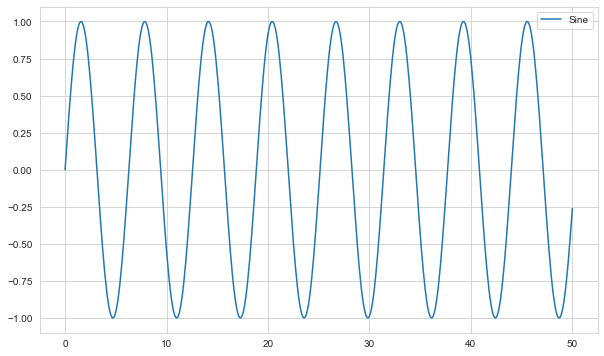

In [138]:
df.plot()
#önceki

Tahminleri ve orjinal df' i görsellestirmek icin forecast' lere index olusturmamiz gerekir. Bu index' lerin de df' e uygun olmasi gerekir. df' teki index' ler 0.1 steplerle gitmis ve en son 50.00' da bitmis. Forecast' ler de bunun arkasina gelecek sekilde 50.1, 50.2 seklinde gitmeli.

In [139]:
forecast_len = len(forecast)
forecast_len

64

In [140]:
step = 0.1

In [141]:
forecast_len * step

6.4

forecast' indexi 50.1' den baslayacak üzerine toplamda 6.4 eklenecek ve 56.5' e kadar gelecek. step=0.1 olacak. Bu sekilde 64 tane index olusturduk ve bir degiskene atadik :

In [142]:
forecast_index = np.arange(50.1, 56.5, step = step)

In [143]:
len(forecast_index)

64

Iki plot' u beraber cizdirerek bir görsel elde ettik. df indexi ve df sütunu ile bir plot islemi yaptik. forecast indexi ile de forecast' i vererek diger plot islemini yaptik. Forecast tahminlerini datanin sonunda gormus olduk. (Her calistirmada farkli sonuclar alinabilir.)

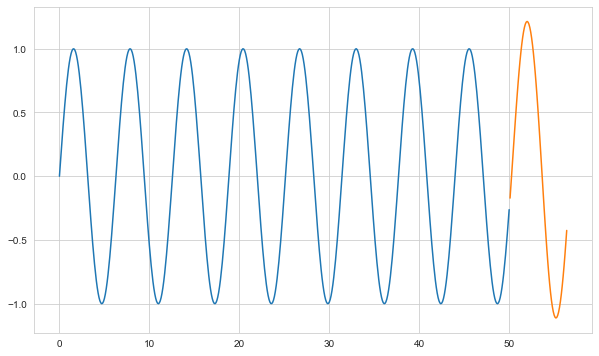

In [144]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);

#bu sekilde cikmis

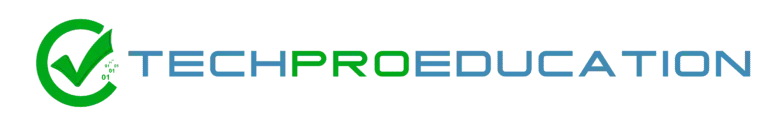